In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools as pt
%matplotlib inline

In [2]:
data = pd.read_csv('ML_Data_Pic.csv')

In [3]:
data.head()

,molecule_chembl_id,0,1,2,3,4,5,6,7,8,...,2040,2041,2042,2043,2044,2045,2046,2047,bioactivity_class,pIC50
0,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,inactive,4.373660
1,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,inactive,4.340084
2,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,inactive,4.373660
3,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,inactive,4.340084
4,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,inactive,4.373660


In [4]:
X = data.drop(['molecule_chembl_id', 'bioactivity_class','pIC50'], axis = 1)

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
y = data.pIC50

In [7]:
y.head()

0    4.373660
1    4.340084
2    4.373660
3    4.340084
4    4.373660
Name: pIC50, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [9]:
clf = RandomForestRegressor(n_estimators=100)

In [10]:
clf.fit(X_train, y_train,)

RandomForestRegressor()

In [11]:
clf.score(X_test, y_test)

0.6286117859544917

In [12]:
y_pred = clf.predict(X_test)

In [13]:
y_np_test = y_test.to_numpy()

In [14]:
y_np_test

array([5.30103   , 5.92081875, 5.30103   , 4.82390874, 5.30103   ,
       4.39794001, 4.69897   , 4.82390874, 6.19449914, 4.65757732,
       5.30103   , 5.92081875, 5.        , 4.65757732, 5.30103   ,
       4.65757732, 5.30103   , 5.30103   , 6.01023881, 4.82390874,
       5.92081875, 1.99999996, 4.69897   , 4.39794001, 4.65757732,
       5.30103   , 5.88605665, 5.6216021 , 4.82390874, 5.92081875,
       5.88605665, 5.30103   , 6.02687215, 9.52287875, 6.13312219,
       5.30103   , 4.65757732, 6.75448733, 5.88605665, 6.91009489,
       4.82390874, 4.82390874, 4.65757732, 5.88605665, 5.30103   ,
       5.30103   , 5.88605665, 5.92081875, 5.30103   , 5.30103   ,
       5.30103   , 5.88605665, 5.30103   , 6.27490548, 1.99999996,
       5.88605665, 4.52287875, 4.82390874, 5.30103   , 6.38721614,
       4.65757732, 5.30103   , 4.82390874, 6.19859629, 6.64502767,
       4.69897   , 5.88605665, 4.65757732, 5.30103   , 5.30103   ,
       2.99999957, 4.65757732, 5.30103   , 7.52287875, 6.73048

<function matplotlib.pyplot.show(*args, **kw)>

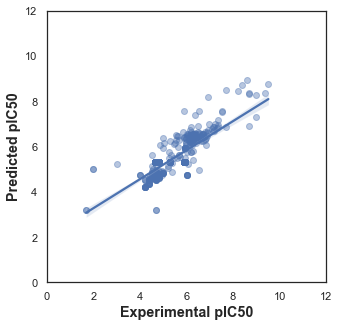

In [15]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_np_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [16]:
new_data = pd.read_csv('substances.csv')

In [17]:
mol_list = new_data['smiles'].tolist()

In [20]:
mol = []
for m in mol_list:
    molec = Chem.MolFromSmiles(m)
    mol.append(molec)

fps = []
for m in mol:
    fp = Chem.RDKFingerprint(m)
    fps.append(fp)

fps_to_bit = []
for f in fps:
    fb = f.ToBitString()
    fps_to_bit.append(fb)

fps_to_list = []
for b in fps_to_bit:
    a = list(b)
    fps_to_list.append(a)

mol_id_list = new_data.zinc_id.tolist()

In [21]:
new_data_2 = pd.DataFrame(np.array(fps_to_list).transpose(), columns=[mol_id_list])

In [22]:
chembl_with_bit = new_data_2.transpose()

In [23]:
chembl_with_bit = chembl_with_bit.reset_index()

In [24]:
chembl_with_bit=chembl_with_bit.rename(columns={'level_0':'zinc_id'})

In [58]:
X_new = chembl_with_bit.drop('zinc_id',axis = 1)

In [59]:
X_new = chembl_with_bit.drop('zinc_id',axis = 1)

In [60]:
predicted_data = pd.DataFrame({'pIC50':clf.predict(X_new)})

In [61]:
predicted_data = pd.concat([predicted_data, chembl_with_bit['zinc_id']], axis = 1)

In [62]:
predicted_data = pd.concat([predicted_data, new_data['smiles']], axis = 1)

In [63]:
predicted_data

,pIC50,zinc_id,smiles
0,6.591369,ZINC000064559000,CCN1CCN(Cc2ccc(C#C[C@]3(CN4Cc5ccc(OC)cc5C4=O)N...
1,6.884267,ZINC000064559336,CCN1CCN(/C(=N\O)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)cc...
2,6.803956,ZINC000096173745,COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(/C(=N/O)N...
3,6.972558,ZINC000096173748,CCCCN1CCN(/C(=N\O)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)...
4,6.466123,ZINC000096173749,COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(/C(=N/O)N...
5,6.431991,ZINC000096173750,COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(/C(=N/O)N...
6,6.545219,ZINC000096173754,CCN1CCN([C@@H](CO)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)...
7,6.545219,ZINC000096173755,CCN1CCN([C@H](CO)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)c...
8,6.496124,ZINC000100628892,CCN1CCN(/C(=N\O)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)c(...
9,6.407761,ZINC000143245662,COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(C(=O)N4CC...


In [64]:
pt.AddMoleculeColumnToFrame(predicted_data, smilesCol='smiles')

In [65]:
predicted_data_2 = predicted_data.drop('smiles', axis = 1)

,pIC50,zinc_id,ROMol
0,6.591369,ZINC000064559000,
1,6.884267,ZINC000064559336,
2,6.803956,ZINC000096173745,
3,6.972558,ZINC000096173748,
4,6.466123,ZINC000096173749,
5,6.431991,ZINC000096173750,
6,6.545219,ZINC000096173754,
7,6.545219,ZINC000096173755,
8,6.496124,ZINC000100628892,
9,6.407761,ZINC000143245662,

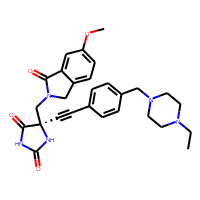
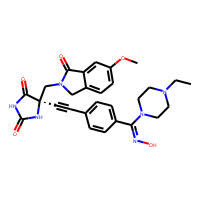
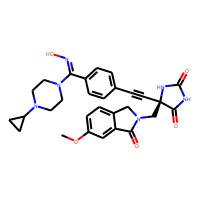
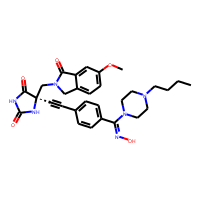
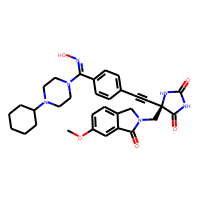
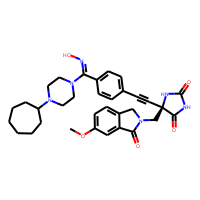
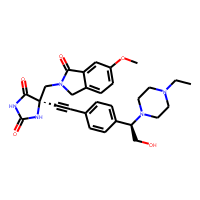
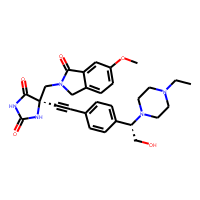
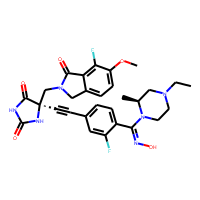
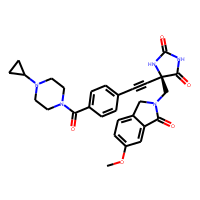
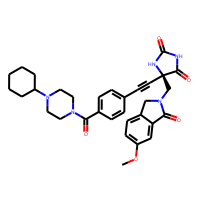
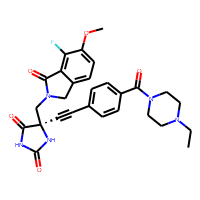
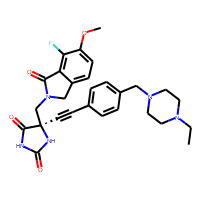
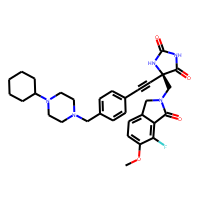
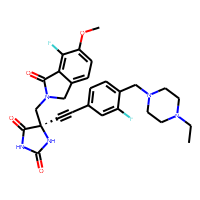
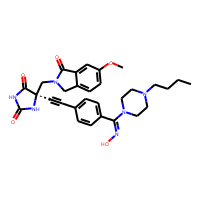
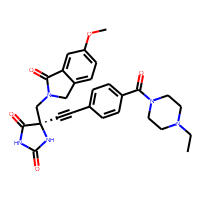
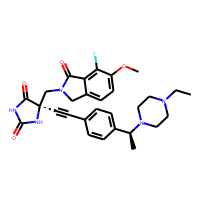
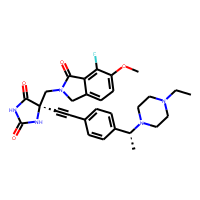
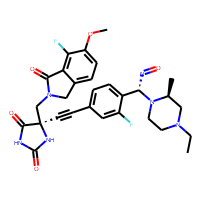
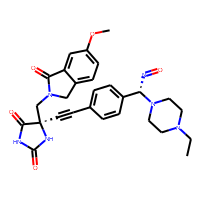
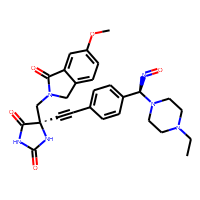
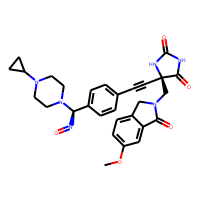
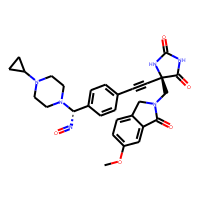
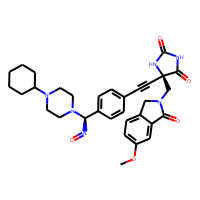
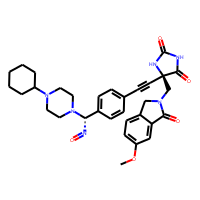
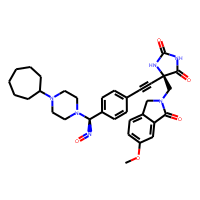
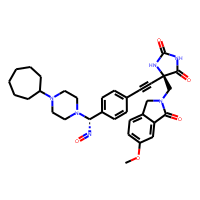
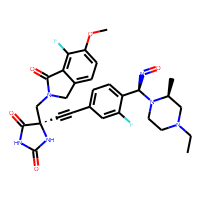

In [66]:
predicted_data_2